In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from scipy.signal import savgol_filter

In [2]:
path="D:/UMD_lustre/Data/SAM/"

Casename1 = 'ASTEX_cold2.6'
Casename11 = 'ASTEX_cold2.6_h-vert-res'
Casename2 = 'ASTEX_warm2.6'
Casename22 = 'ASTEX_warm2.6_h-vert-res'

In [3]:
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f11 = xr.open_mfdataset(path + Casename11 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f2 = xr.open_mfdataset(path + Casename2 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f22 = xr.open_mfdataset(path + Casename22 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [18]:
f11

<xarray.Dataset>
Dimensions:     (time: 60, z: 810)
Coordinates:
  * z           (z) float32 10.5 22.5 37.5 ... 4.022e+03 4.143e+03 4.275e+03
  * time        (time) float32 165.0 165.1 165.1 165.1 ... 167.4 167.4 167.5
Data variables: (12/623)
    p           (z) float32 dask.array<chunksize=(810,), meta=np.ndarray>
    SST         (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    Ps          (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLDSHD      (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    AREAPREC    (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLD245      (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    ...          ...
    QCSDN       (time, z) float32 dask.array<chunksize=(60, 810), meta=np.ndarray>
    QRSDN       (time, z) float32 dask.array<chunksize=(60, 810), meta=np.ndarray>
    CONPSDN     (time, z) float32 dask.array<chunksize=(60, 810), meta=np.ndarray>
    QCENV       (time, z) float32 dask.array<chunksize=(60, 810), meta=np.ndarray>
    QRENV       (time, z) float32 dask.array<chunksize=(60, 810), meta=np.ndarray>
    CONPENV     (time, z) float32 dask.array<chunksize=(60, 810), meta=np.ndarray>
Attributes:
    SAM version:  
    caseid:       120x120x512_35m_DRZ_RRTM_N100

In [4]:
f1 = f1.isel(time = slice(0,60))
f11 = f11.isel(time = slice(0,60))
f2 = f2.isel(time = slice(0,60))
f22 = f22.isel(time = slice(0,60))

nt = f1['time'].size
t_hours = np.arange(nt)

z = f1['z']/1000.

myfontsize = 12

In [5]:
zz = f11['z']/1000.

In [6]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], cbar = False, xlabel = False, ylabel = False, out = False):
    if len(mylevels) == 1:
#         norm = cm.colors.BoundaryNorm(mylevels,256)
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', shrink=1.)
        cbar.set_label(ztitle, fontsize=myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim([0, 60])
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

In [7]:
def pltprf(ax, var1, var11, var2, var22, z, zz, zcb1, zcb2, zct1, zct2,
#            xlim,
           xlabel = ' ', ylabel = ' '):
    
    ax.plot(var1, z, linewidth=2, label = 'CADV', color = 'dodgerblue')
    ax.plot(var11, zz, linewidth=2, label = 'CADV_hvertres', linestyle = '--',color = 'dodgerblue')
    
    ax.plot(var2, z, linewidth=2, label = 'WADV', color = 'crimson')
    ax.plot(var22, zz, linewidth=2, label = 'WADV_hvertres', linestyle = '--', color = 'crimson')
    
#     ax.fill_between(xlim, [zcb1, zcb1], [zct1, zct1], color='dodgerblue', alpha=.3)
#     ax.fill_between(xlim, [zcb2, zcb2], [zct2, zct2], color='crimson', alpha=.3)
    
    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
    
    ax.set_ylim([0., 1.5])
#     ax.set_xlim(xlim)
    
    ax.grid(True)

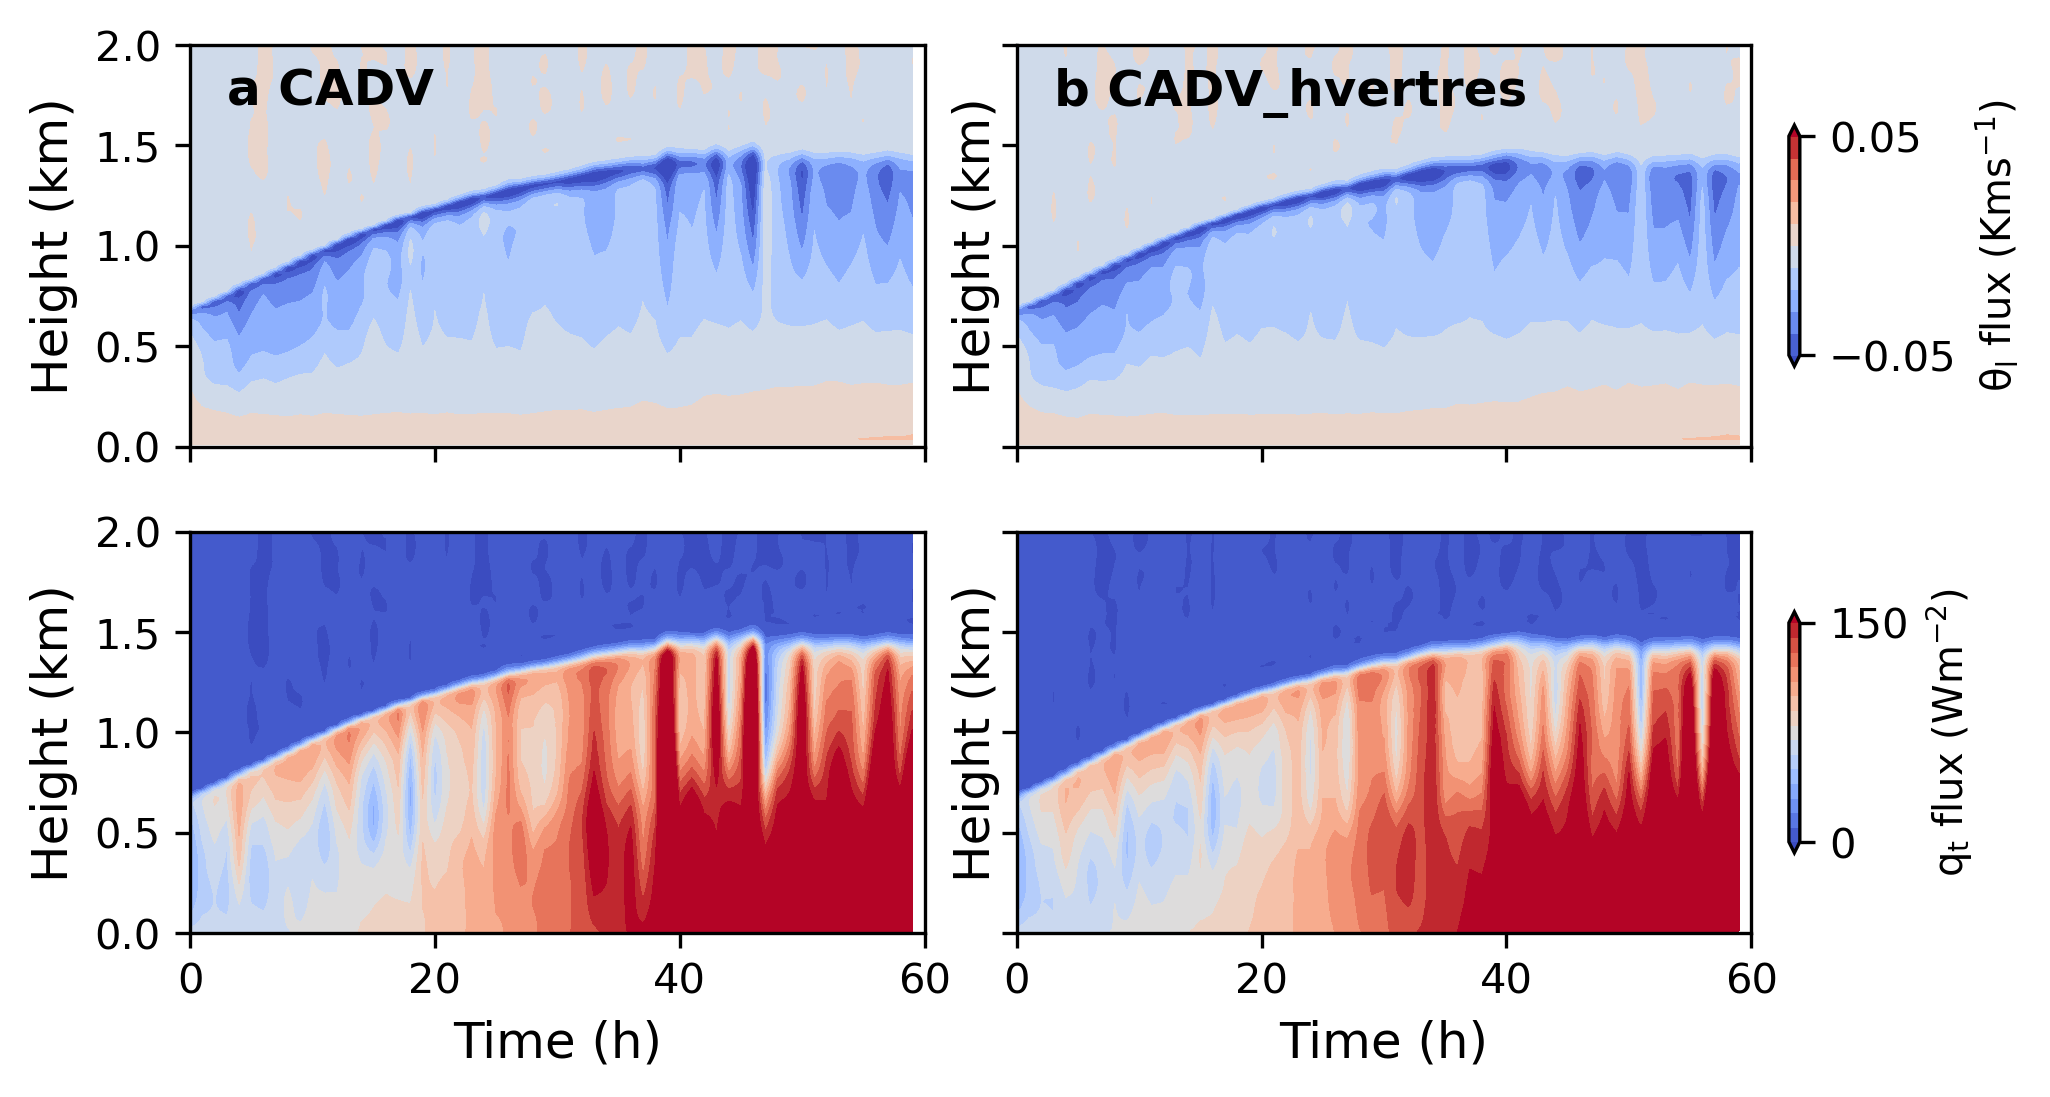

In [8]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 2,
                        sharex = True, sharey = True,
                        figsize=(18/2.54, (9)/2.54), dpi = 300)
plt.tight_layout()

#
mylevels = np.linspace(-0.05, 0.05, 10 + 1)

oax = plt2D(fig, axs[0,0], t_hours, z, f1['THLFLUX'].T, 'THLFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True)

oax = plt2D(fig, axs[0,1], t_hours, zz, f11['THLFLUX'].T, 'THLFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[0], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{\theta_l \ flux \ (Kms^{-1})}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(0., 150, 15 + 1)

oax = plt2D(fig, axs[1,0], t_hours, z, f1['QTFLUX'].T, 'QTFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True, xlabel = True)

oax = plt2D(fig, axs[1,1], t_hours, zz, f11['QTFLUX'].T, 'QTFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True, xlabel = True)

cbar = fig.colorbar(oax,  ax=axs[1], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{q_t \ flux \ (Wm^{-2})}$", fontsize=0.8*myfontsize)


mylabel = np.array((['a CADV','b CADV_hvertres'],['','']))
for i in range(2):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

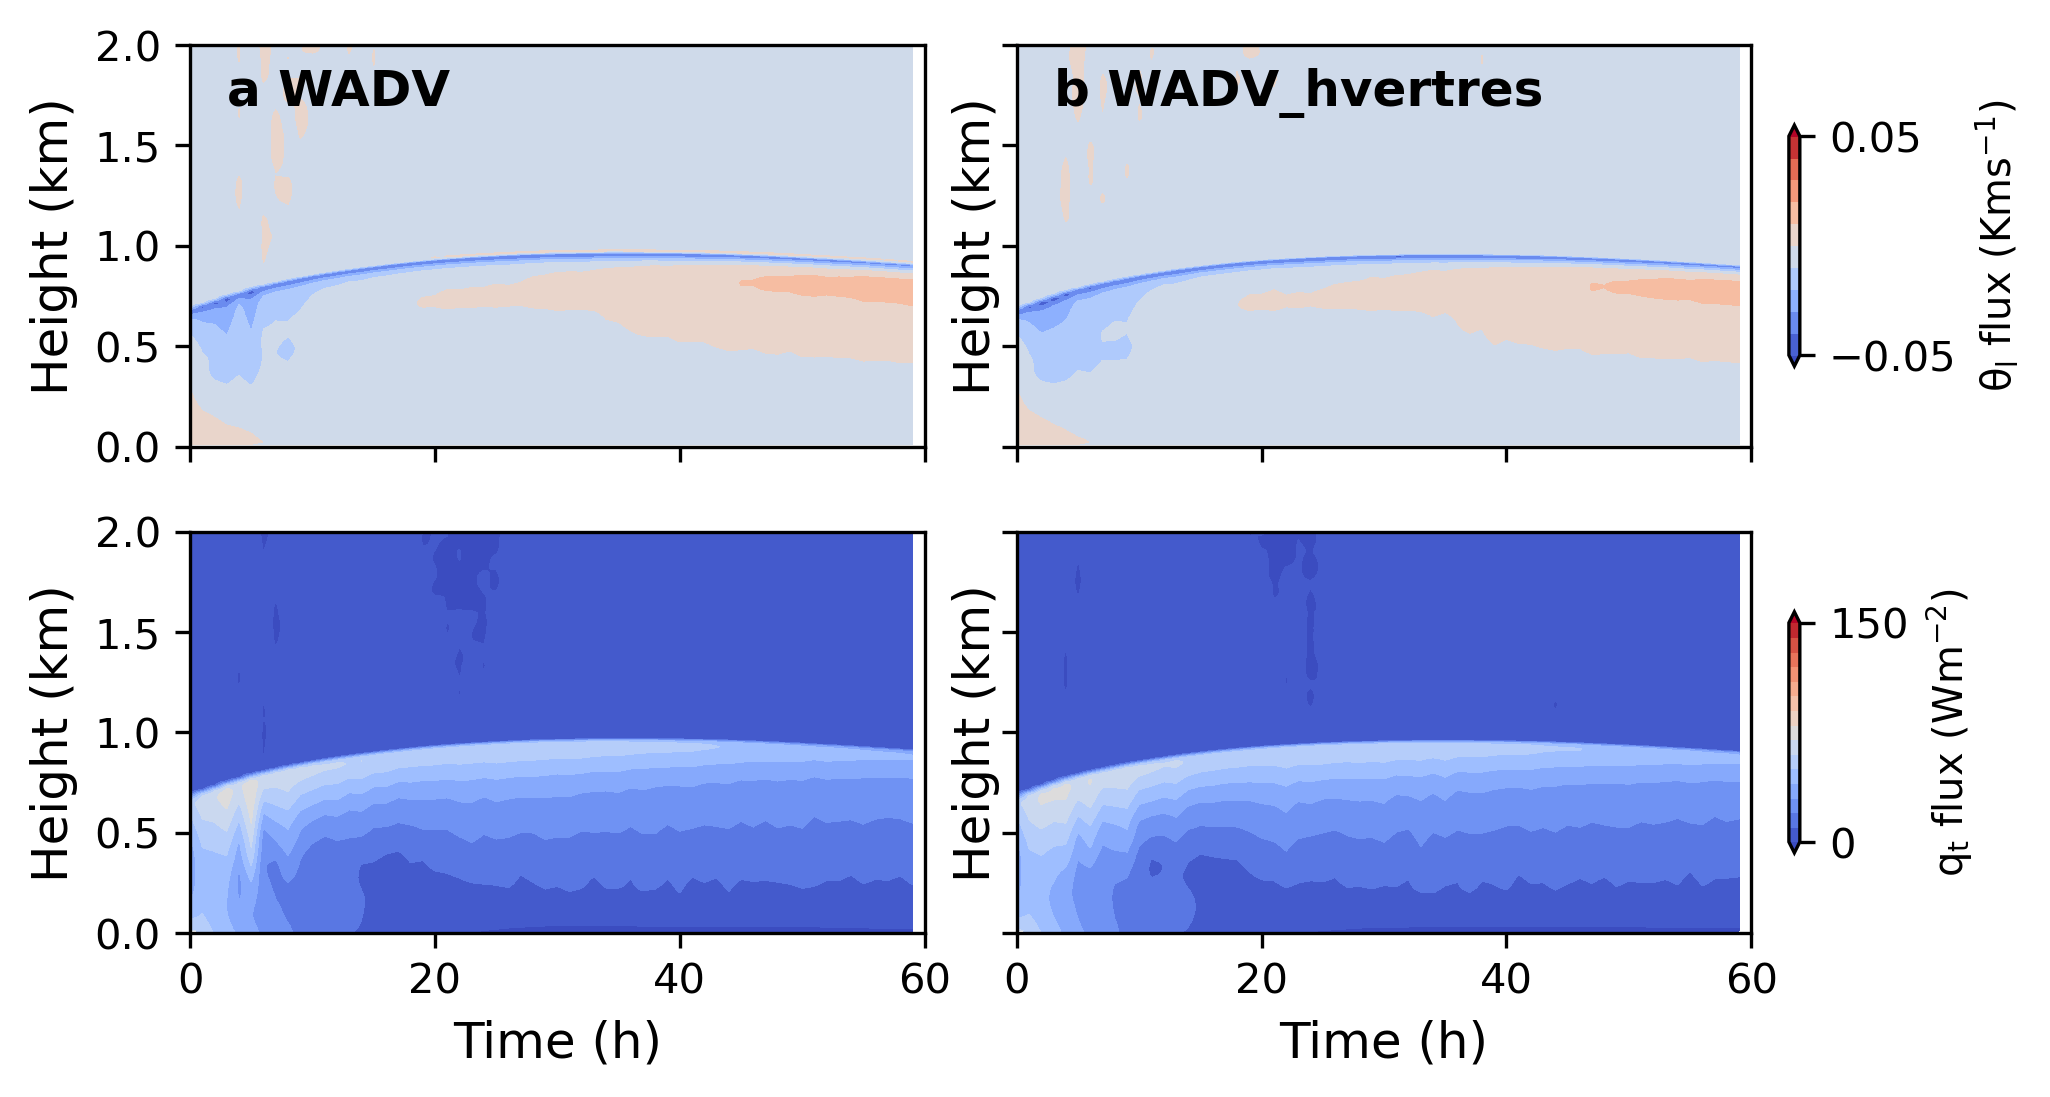

In [11]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 2,
                        sharex = True, sharey = True,
                        figsize=(18/2.54, (9)/2.54), dpi = 300)
plt.tight_layout()

#
mylevels = np.linspace(-0.05, 0.05, 10 + 1)

oax = plt2D(fig, axs[0,0], t_hours, z, f2['THLFLUX'].T, 'THLFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True)

oax = plt2D(fig, axs[0,1], t_hours, zz, f22['THLFLUX'].T, 'THLFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[0], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{\theta_l \ flux \ (Kms^{-1})}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(0., 150, 15 + 1)

oax = plt2D(fig, axs[1,0], t_hours, z, f2['QTFLUX'].T, 'QTFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True, xlabel = True)

oax = plt2D(fig, axs[1,1], t_hours, zz, f22['QTFLUX'].T, 'QTFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True, xlabel = True)

cbar = fig.colorbar(oax,  ax=axs[1], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{q_t \ flux \ (Wm^{-2})}$", fontsize=0.8*myfontsize)


mylabel = np.array((['a WADV','b WADV_hvertres'],['','']))
for i in range(2):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

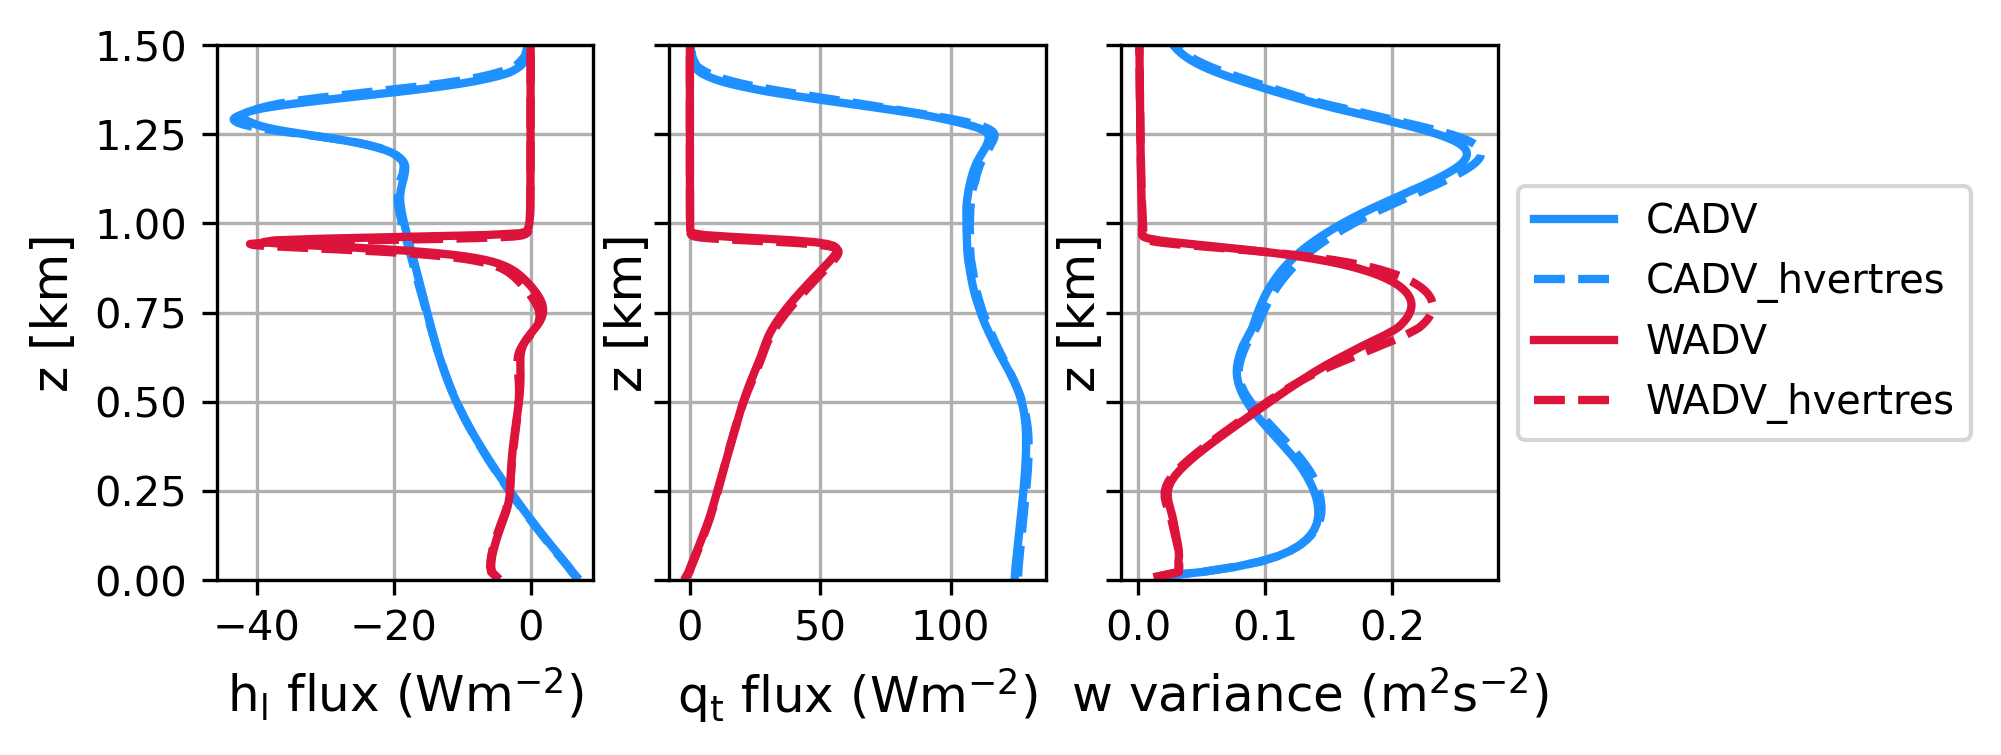

In [10]:
ind = 30
ind_interval = 5

fig, axs = plt.subplots(ncols = 3,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (6)/2.54), dpi = 300)

pltprf(axs[0], f1['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), 
       f11['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f22['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, zz, 
       f1['zcb'][ind]/1000., f2['zcb'][ind]/1000.,
       f1['zct'][ind]/1000., f2['zct'][ind]/1000.,
#        [287, 297],
       xlabel = r"$\mathrm{h_l \ flux \ (Wm^{-2})}$", ylabel = 'z [km]')

pltprf(axs[1], f1['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f11['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f22['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, zz,
       f1['zcb'][ind]/1000., f2['zcb'][ind]/1000.,
       f1['zct'][ind]/1000., f2['zct'][ind]/1000.,
#        [287, 297],
       xlabel = r"$\mathrm{q_t \ flux \ (Wm^{-2})}$", ylabel = 'z [km]')

pltprf(axs[2], f1['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f11['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f22['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, zz,
       f1['zcb'][ind]/1000., f2['zcb'][ind]/1000.,
       f1['zct'][ind]/1000., f2['zct'][ind]/1000.,
#        [287, 297],
       xlabel = r"$\mathrm{w \ variance \ (m^{2}s^{-2})}$", ylabel = 'z [km]')

axs[2].legend(bbox_to_anchor=(1.,0.5), loc="center left", fontsize=0.8*myfontsize)